In [122]:
import numpy as np
import matplotlib as mpl
from astropy.io import fits
from matplotlib import pyplot as plt
import os

In [123]:
def center_of_mass(data):
    normalized_data = data / np.max(data)
    y, x = np.ogrid[0 : data.shape[-2], 0 : data.shape[-1]]
    while len(data.shape) > len(x.shape):
        x = np.expand_dims(x, axis=0)
        y = np.expand_dims(y, axis=0)
    first_moment_x = x * normalized_data
    first_moment_y = y * normalized_data
    mean_mass = np.mean(normalized_data, axis=(-2, -1))
    return (np.mean(first_moment_x, axis=(-2, -1)) / mean_mass,
            np.mean(first_moment_y, axis=(-2, -1)) / mean_mass)

def get_photometry_magnitude(
        data, center, radius_min=2, radius_max=30, gain=1, readnoise=1):
    y, x = np.ogrid[0 : data.shape[-2], 0 : data.shape[-1]]
    dist = np.sqrt((x - center[0])**2 + (y - center[1])**2)

    max_snr = 0
    snrs = []
    radiuss = []
    for radius in range(radius_min, radius_max + 1):
        star_data = data[dist <= radius]
        sum_brightness = np.sum(star_data)
        background_data = (data[(2 * radius < dist) & (dist < 3 * radius)])
        background_brightness = np.median(background_data) * len(star_data)
        background_noise = sum_brightness
    
        corrected_brightness = sum_brightness - background_brightness
        noise = np.sqrt(
            (background_noise / gain)
            + (len(star_data) * readnoise)**2)
        snr = corrected_brightness / gain / noise

        if snr > max_snr:
            max_snr = snr
            best_radius = radius
            best_brightness = corrected_brightness
        snrs.append(snr)
        radiuss.append(radius)

    plt.figure(figsize=(8, 6))
    plt.scatter(radiuss, snrs, color='blue', label='Data')
    plt.plot(radiuss, snrs, 'r--')
    plt.xlabel("Radius")
    plt.ylabel("SNR")
    plt.title("SNR VS Radius")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    best_uncertainty = 1.08 / max_snr
    return -2.5 * np.log10(best_brightness), best_uncertainty, best_radius, max_snr


In [124]:
data = fits.open("C:/kiavash/codes/Astro_Lab/hw8/postprocess/final_stacked_image.fits")[0].data

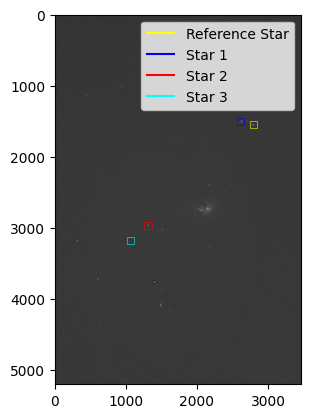

In [125]:
fig, ax = plt.subplots()
ax.imshow(data, cmap='gray')

# reference star
ax.add_patch(mpl.patches.Rectangle(
    (2740, 1500), 100, 100, lw=0.4, color="yellow", fill=False, clip_on=False))
# target stars
ax.add_patch(mpl.patches.Rectangle(
    (2560, 1450), 100, 100, lw=0.4, color="blue", fill=False, clip_on=False))
ax.add_patch(mpl.patches.Rectangle(
    (1260, 2920), 100, 100, lw=0.4, color="red", fill=False, clip_on=False))
ax.add_patch(mpl.patches.Rectangle(
    (1012, 3133), 100, 100, lw=0.4, color="cyan", fill=False, clip_on=False))

ax.plot([], [], color="yellow", label=f"Reference Star")
ax.plot([], [], color="blue", label=f"Star 1")
ax.plot([], [], color="red", label=f"Star 2")
ax.plot([], [], color="cyan", label=f"Star 3")
ax.legend()

plt.show()

In [126]:
reference_center = center_of_mass(data[1543:1571, 2761:2799])
star1_center = center_of_mass(data[1493:1522, 2598:2632])
star2_center = center_of_mass(data[2954:2977, 1293:1317])
star3_center = center_of_mass(data[3133:3160, 1012:1041])

reference_center_ref = (reference_center[0] + 2761, reference_center[1] + 1543)
star1_center_ref = (star1_center[0] + 2598, star1_center[1] + 1493)
star2_center_ref = (star2_center[0] + 1293, star2_center[1] + 2954)
star3_center_ref = (star3_center[0] + 1012, star3_center[1] + 3133)

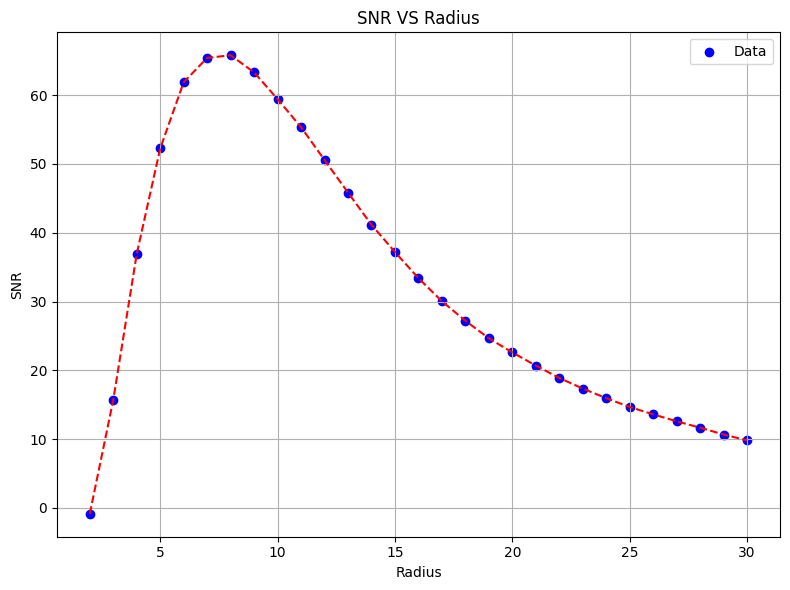

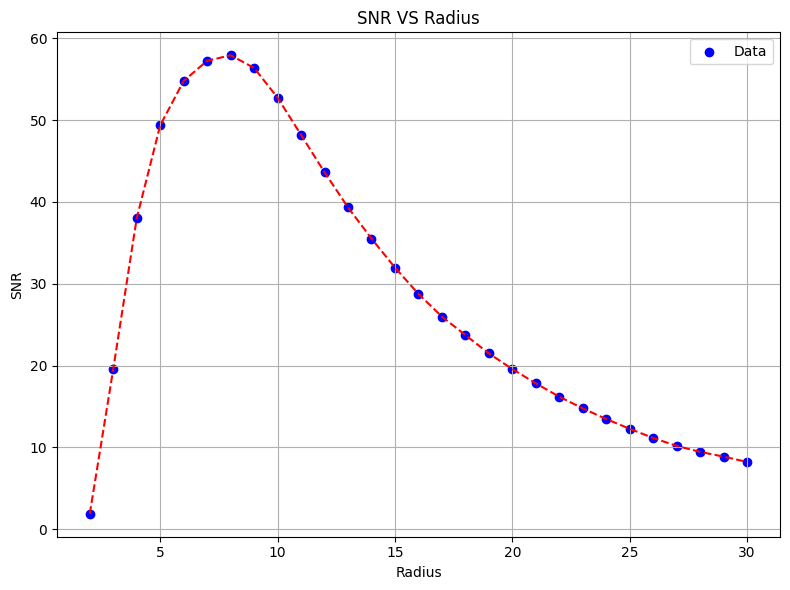

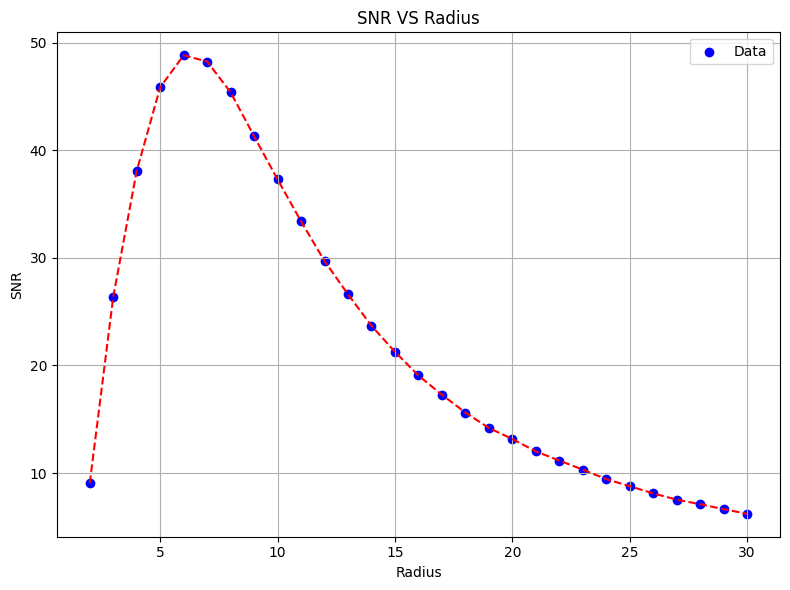

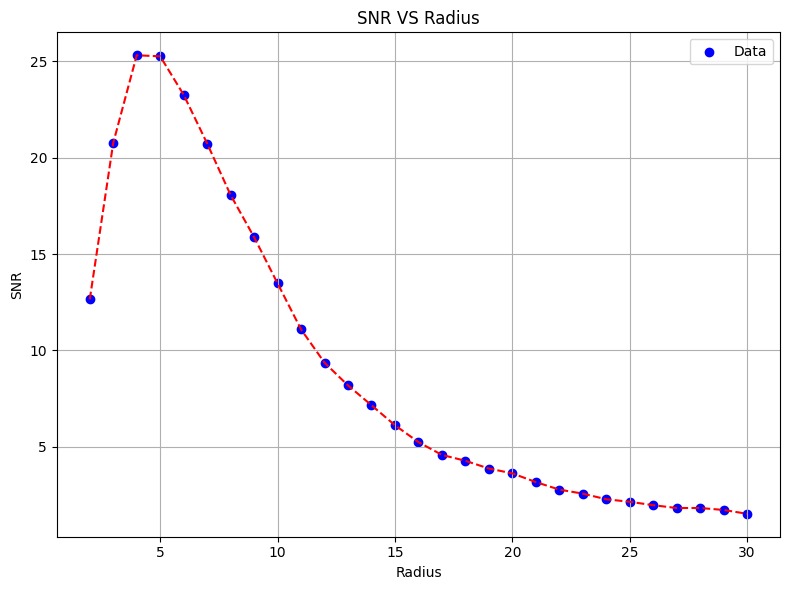

In [127]:
reference_photometry = get_photometry_magnitude(data, reference_center_ref)
star1_photometry = get_photometry_magnitude(data, star1_center_ref)
star2_photometry = get_photometry_magnitude(data, star2_center_ref)
star3_photometry = get_photometry_magnitude(data, star3_center_ref)

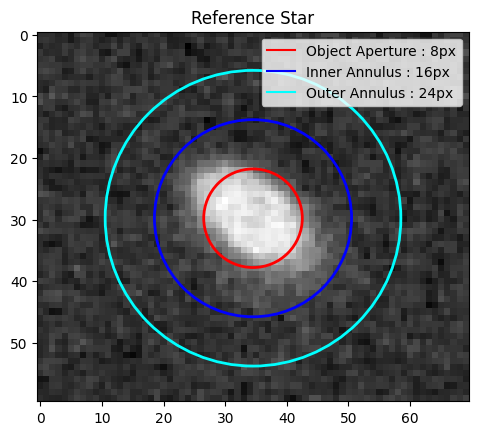

SNR =  65.80239423458158


In [128]:
reference_center_plot = (reference_center[0] + 2*reference_photometry[2], reference_center[1] + 2*reference_photometry[2])
fig, ax = plt.subplots()
ax.imshow(data[1543-2*reference_photometry[2] : 1571+ 2*reference_photometry[2], 2761-2*reference_photometry[2]:2799+2*reference_photometry[2]], cmap="gray")
ax.add_patch(mpl.patches.Circle(reference_center_plot, reference_photometry[2], color="red", fill=False, lw=2))
ax.add_patch(mpl.patches.Circle(reference_center_plot, 2*reference_photometry[2], color="blue", fill=False, lw=2))
ax.add_patch(mpl.patches.Circle(reference_center_plot, 3*reference_photometry[2], color="cyan", fill=False, lw=2))
ax.plot([], [], color="red", label=f"Object Aperture : {reference_photometry[2]}px")
ax.plot([], [], color="blue", label=f"Inner Annulus : {2 * reference_photometry[2]}px")
ax.plot([], [], color="cyan", label=f"Outer Annulus : {3 * reference_photometry[2]}px")
ax.legend()
ax.set_title("Reference Star")
plt.show()
print("SNR = ", reference_photometry[3])

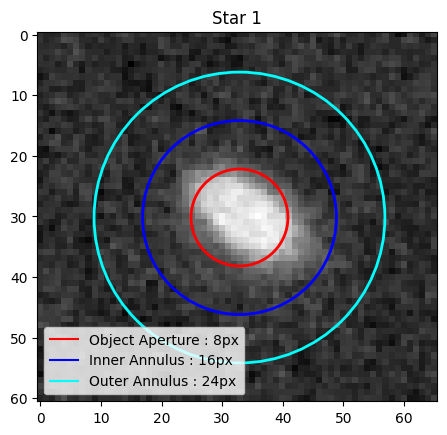

SNR =  57.93113588337315


In [129]:
star1_center_plot = (star1_center[0] + 2*star1_photometry[2], star1_center[1] + 2*star1_photometry[2])
fig, ax = plt.subplots()
ax.imshow(data[1493-2*star1_photometry[2] : 1522+ 2*star1_photometry[2], 2598-2*star1_photometry[2]:2632+2*star1_photometry[2]], cmap="gray")
ax.add_patch(mpl.patches.Circle(star1_center_plot, star1_photometry[2], color="red", fill=False, lw=2))
ax.add_patch(mpl.patches.Circle(star1_center_plot, 2*star1_photometry[2], color="blue", fill=False, lw=2))
ax.add_patch(mpl.patches.Circle(star1_center_plot, 3*star1_photometry[2], color="cyan", fill=False, lw=2))
ax.plot([], [], color="red", label=f"Object Aperture : {star1_photometry[2]}px")
ax.plot([], [], color="blue", label=f"Inner Annulus : {2 * star1_photometry[2]}px")
ax.plot([], [], color="cyan", label=f"Outer Annulus : {3 * star1_photometry[2]}px")
ax.legend()
ax.set_title("Star 1")
plt.show()
print("SNR = ", star1_photometry[3])

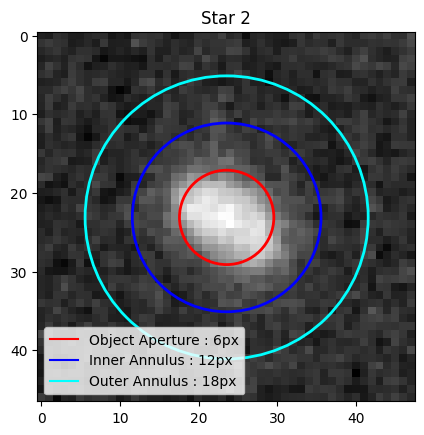

SNR =  48.8286528693442


In [130]:
star2_center_plot = (star2_center[0] + 2*star2_photometry[2], star2_center[1] + 2*star2_photometry[2])
fig, ax = plt.subplots()
ax.imshow(data[2954-2*star2_photometry[2] : 2977+ 2*star2_photometry[2], 1293-2*star2_photometry[2]:1317+2*star2_photometry[2]], cmap="gray")
ax.add_patch(mpl.patches.Circle(star2_center_plot, star2_photometry[2], color="red", fill=False, lw=2))
ax.add_patch(mpl.patches.Circle(star2_center_plot, 2*star2_photometry[2], color="blue", fill=False, lw=2))
ax.add_patch(mpl.patches.Circle(star2_center_plot, 3*star2_photometry[2], color="cyan", fill=False, lw=2))
ax.plot([], [], color="red", label=f"Object Aperture : {star2_photometry[2]}px")
ax.plot([], [], color="blue", label=f"Inner Annulus : {2 * star2_photometry[2]}px")
ax.plot([], [], color="cyan", label=f"Outer Annulus : {3 * star2_photometry[2]}px")
ax.legend()
ax.set_title("Star 2")
plt.show()
print("SNR = ", star2_photometry[3])

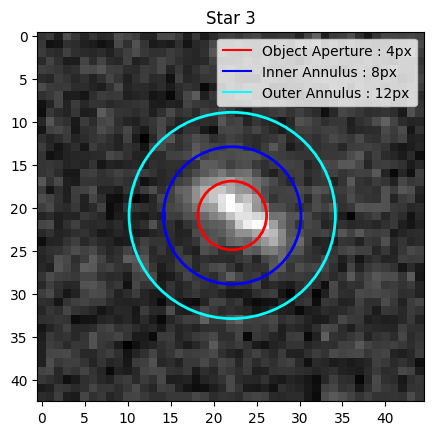

SNR =  25.31531471450231


In [131]:
star3_center_plot = (star3_center[0] + 2*star3_photometry[2], star3_center[1] + 2*star3_photometry[2])
fig, ax = plt.subplots()
ax.imshow(data[3133-2*star3_photometry[2] : 3160+ 2*star3_photometry[2], 1012-2*star3_photometry[2]:1041+2*star3_photometry[2]], cmap="gray")
ax.add_patch(mpl.patches.Circle(star3_center_plot, star3_photometry[2], color="red", fill=False, lw=2))
ax.add_patch(mpl.patches.Circle(star3_center_plot, 2*star3_photometry[2], color="blue", fill=False, lw=2))
ax.add_patch(mpl.patches.Circle(star3_center_plot, 3*star3_photometry[2], color="cyan", fill=False, lw=2))
ax.plot([], [], color="red", label=f"Object Aperture : {star3_photometry[2]}px")
ax.plot([], [], color="blue", label=f"Inner Annulus : {2 * star3_photometry[2]}px")
ax.plot([], [], color="cyan", label=f"Outer Annulus : {3 * star3_photometry[2]}px")
ax.legend()
ax.set_title("Star 3")
plt.show()
print("SNR = ", star3_photometry[3])

In [132]:
print(f"Star 1: {4.59 + star1_photometry[0] - reference_photometry[0]}, Error = "
      f"{np.sqrt(reference_photometry[1]**2 + star1_photometry[1]**2)}")
print(f"Star 2: {4.59 + star2_photometry[0] - reference_photometry[0]}, Error = "
      f"{np.sqrt(reference_photometry[1]**2 + star2_photometry[1]**2)}")
print(f"Star 3: {4.59 + star3_photometry[0] - reference_photometry[0]}, Error = "
      f"{np.sqrt(reference_photometry[1]**2 + star3_photometry[1]**2)}")

Star 1: 4.749497305909417, Error = 0.02483815901609324
Star 2: 5.388625111107263, Error = 0.027542553957972234
Star 3: 6.762496909531514, Error = 0.04571016175627247
